Import the required modules

In [10]:
"""Import the required modules"""
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.linalg import pinv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [70]:
def get_tables(file1, file2):
    
  # Reads in files.
  dfs = [pd.read_csv(file1), pd.read_csv(file2)]

  # Create dummies.
  a = 0
  for i, df in enumerate(dfs):
    dfs[i] = pd.get_dummies(df)
    dfs[i] = pd.concat([dfs[i].iloc[:, :4], dfs[i].iloc[:, -5+a:], dfs[i].iloc[:, 4:8+a]], axis=1)
    a += 1

#   # Rearrange columns.
#   dfs[0] = pd.concat([dfs[0].iloc[:, :4], dfs[0].iloc[:, -5:], dfs[0].iloc[:, 4:8]], axis=1)
#   dfs[1] = pd.concat([dfs[1].iloc[:, :4], dfs[1].iloc[:, -4:], dfs[1].iloc[:, 4:9]], axis=1)

  return tuple(dfs)


In [71]:
file = 'welding_data_by_properties.csv', 'welding_data_by_welding_types.csv'
df = get_tables(file[0], file[1])

In [74]:
df[0].shape

(45, 13)

In [97]:
def explore(df, p_start_cols, p_end_cols, t_start_cols, t_end_cols, n_plots, x):
  pos = 1
  for i in range(p_start_cols, p_end_cols):
    print(f'\t{df.columns[i].capitalize()} vs Response values')
    plt.figure(figsize=[15, 5])
    for j in range(t_start_cols, t_end_cols+x):
      plt.subplot(1, n_plots, pos)
      plt.scatter(df.iloc[:, i], df.iloc[:, j])
      plt.ylabel(df.columns[j])
      plt.xlabel(df.columns[i])
      pos += 1
    plt.tight_layout()
    plt.show()
    print('\n')
    pos = 1

Welding Data by Properties
Data Statistical Summary


,current,voltage,welding_speed,plate_thickness,property_flexural_strength,property_hardness,property_heat_input,property_residual_stress,property_tensile_strength,saw,smaw,gmaw,gtaw
count,45.000000,45.000000,45.000000,45.000000,45.00000,45.00000,45.00000,45.00000,45.00000,45.000000,45.000000,45.000000,45.000000
mean,130.000000,28.000000,120.000000,8.000000,0.20000,0.20000,0.20000,0.20000,0.20000,591.946667,488.731111,495.764444,414.564444
std,24.771685,3.302891,24.771685,1.651446,0.40452,0.40452,0.40452,0.40452,0.40452,728.039372,576.698282,574.142362,424.784265
min,100.000000,24.000000,90.000000,6.000000,0.00000,0.00000,0.00000,0.00000,0.00000,95.600000,90.100000,92.400000,48.800000
25%,100.000000,24.000000,90.000000,6.000000,0.00000,0.00000,0.00000,0.00000,0.00000,220.600000,180.200000,191.100000,103.000000
50%,130.000000,28.000000,120.000000,8.000000,0.00000,0.00000,0.00000,0.00000,0.00000,312.600000,264.600000,274.000000,336.800000
75%,160.000000,32.000000,150.000000,10.000000,0.00000,0.00000,0.00000,0.00000,0.00000,410.500000,424.600000,438.400000,422.800000
max,160.000000,32.000000,150.000000,10.000000,1.00000,1.00000,1.00000,1.00000,1.00000,2986.000000,2389.000000,2389.000000,1792.000000



Explore data graphically
	Current vs Response values


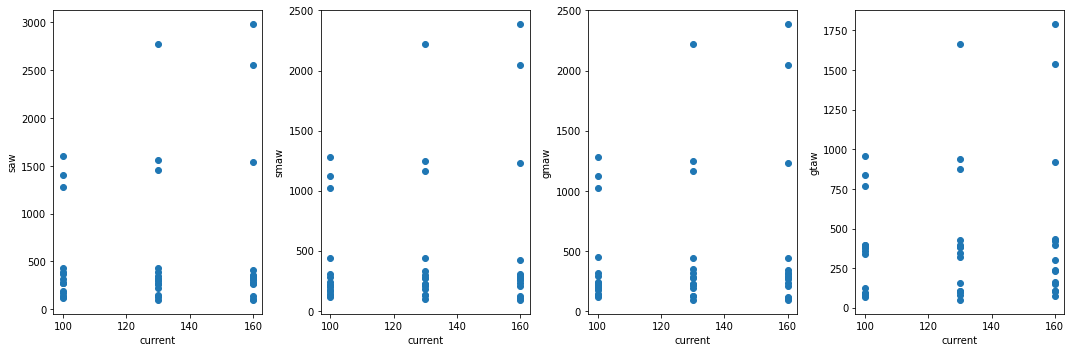



	Voltage vs Response values


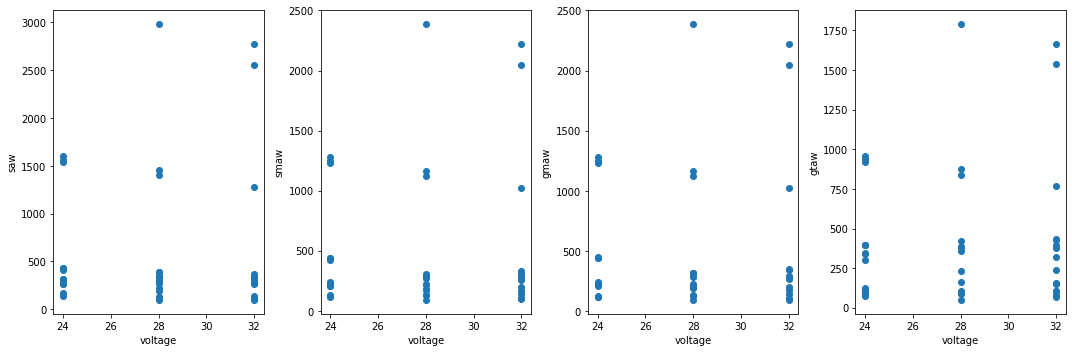



	Welding_speed vs Response values


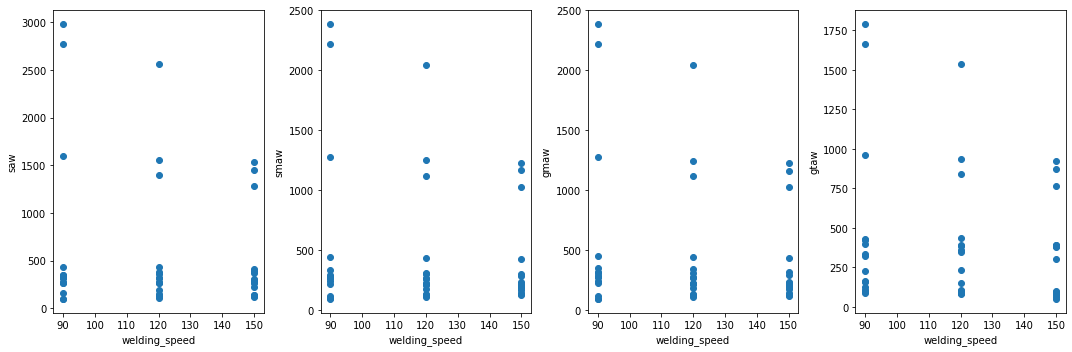



	Plate_thickness vs Response values


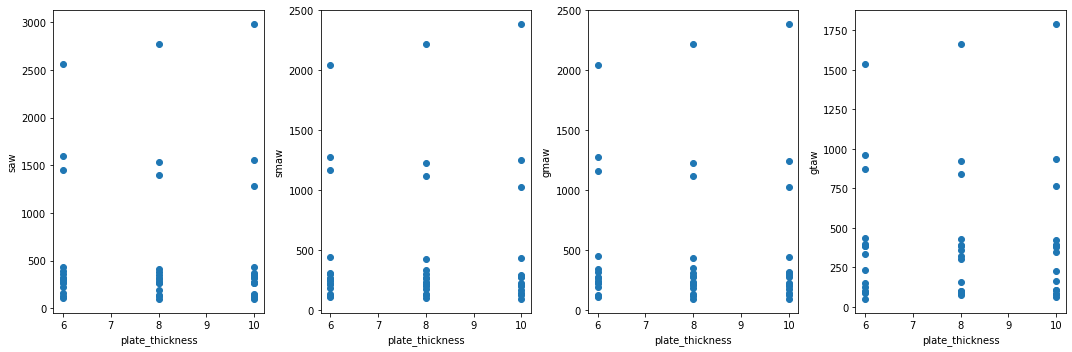



Welding Data by Welding types
Data Statistical Summary


,current,voltage,welding_speed,plate_thickness,welding_type_GMAW,welding_type_GTAW,welding_type_SAW,welding_type_SMAW,heat_input,tensile_strength,flexural_strength,hardness_value,residual_stress
count,36.00000,36.000000,36.00000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,130.00000,28.000000,120.00000,8.000000,0.250000,0.250000,0.250000,0.250000,1524.583333,373.286111,272.186111,111.563889,207.138889
std,24.84236,3.312315,24.84236,1.656157,0.439155,0.439155,0.439155,0.439155,584.947537,53.623178,50.159256,24.527665,69.964474
min,100.00000,24.000000,90.00000,6.000000,0.000000,0.000000,0.000000,0.000000,768.000000,275.000000,196.000000,48.800000,82.000000
25%,100.00000,24.000000,90.00000,6.000000,0.000000,0.000000,0.000000,0.000000,1120.000000,329.250000,231.950000,95.500000,162.650000
50%,130.00000,28.000000,120.00000,8.000000,0.000000,0.000000,0.000000,0.000000,1280.000000,383.000000,269.250000,112.700000,205.500000
75%,160.00000,32.000000,150.00000,10.000000,0.250000,0.250000,0.250000,0.250000,1856.000000,425.075000,302.425000,128.850000,266.600000
max,160.00000,32.000000,150.00000,10.000000,1.000000,1.000000,1.000000,1.000000,2986.000000,448.200000,394.400000,164.000000,325.200000



Explore data graphically
	Current vs Response values


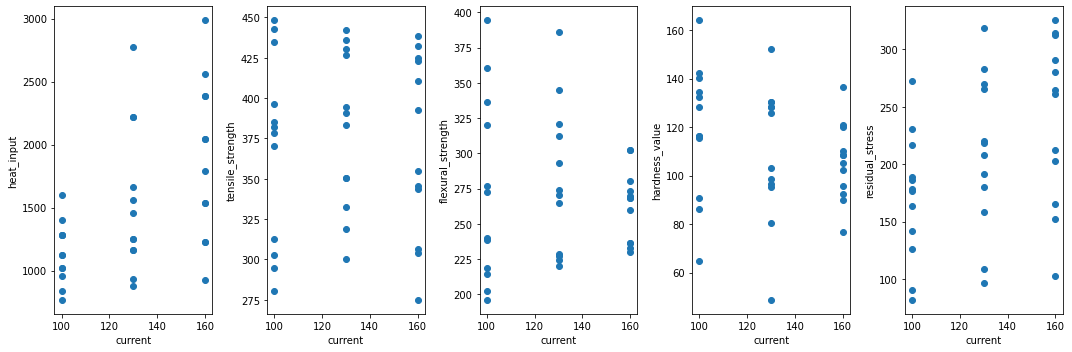



	Voltage vs Response values


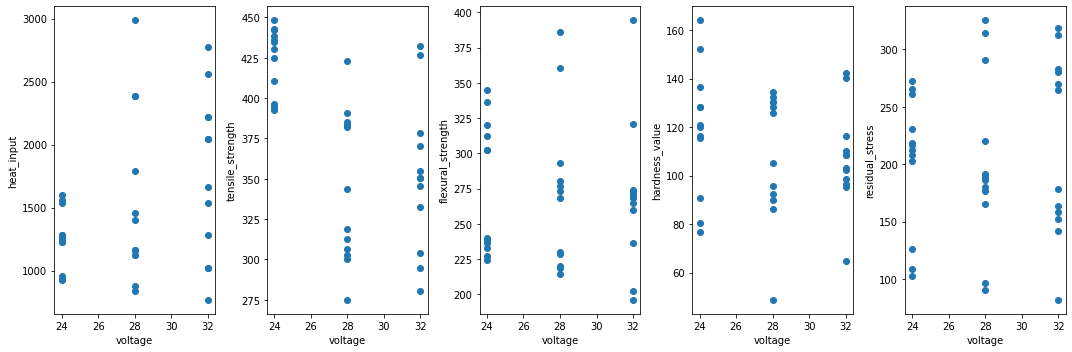



	Welding_speed vs Response values


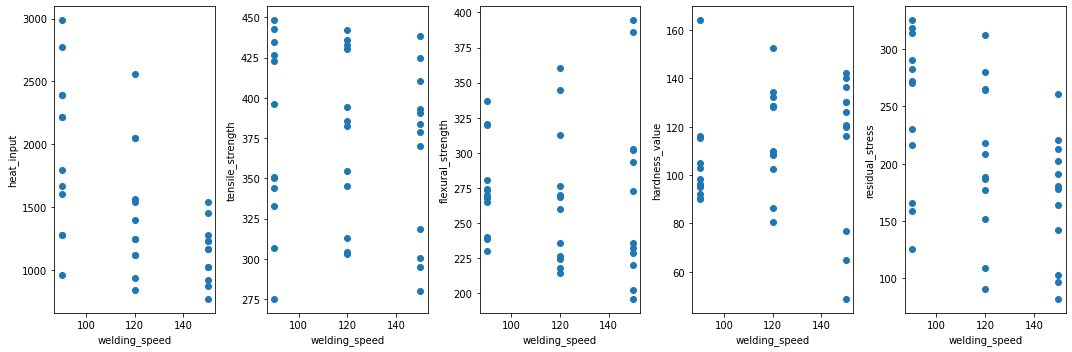



	Plate_thickness vs Response values


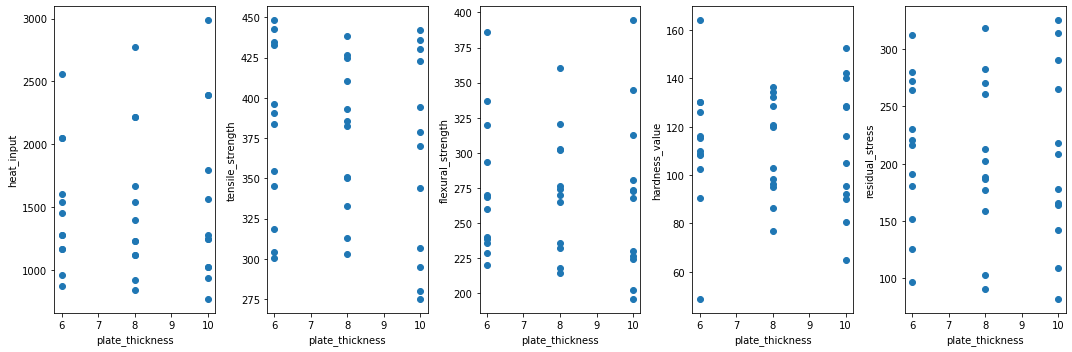

In [100]:
table = ['Welding Data by Properties', 'Welding Data by Welding types']
for x in range(2):
    print(table[x])

    print('Data Statistical Summary')
    display(df[x].describe())
    print('')

    print('Explore data graphically')
    explore(df[x], 0, 4, 9-x, 13-x, 4+x, x)